#Data Toolkit

1. What is NumPy, and why is it widely used in Python?
- NumPy (Numerical Python) is a **fundamental library** for scientific computing in Python. It provides support for **large, multi-dimensional arrays and matrices**, along with a vast collection of high-level **mathematical functions** to operate on these arrays efficiently.

 ### **NumPy Widely Used in Python because:**
1. **Efficient Array Operations**  
   - NumPy's core is the `ndarray` (N-dimensional array), which is **faster** and more memory-efficient than Python lists for numerical computations.
   - It uses **contiguous memory blocks** and optimized C/C++/Fortran under the hood, making operations much quicker.

2. **Broadcasting & Vectorization**  
   - Allows **element-wise operations** without explicit loops (vectorization), leading to cleaner and faster code.
   - Supports **broadcasting**, enabling operations between arrays of different shapes.

3. **Mathematical & Statistical Functions**  
   - Comes with built-in functions for linear algebra, Fourier transforms, random number generation, statistics, and more.

4. **Interoperability**  
   - Works seamlessly with other scientific libraries like **SciPy, Pandas, Matplotlib, Scikit-learn, and TensorFlow**.

5. **Memory Efficiency**  
   - NumPy arrays consume **less memory** than Python lists for numerical data.

6. **Performance**  
   - Critical for **data science, machine learning, and engineering simulations**, where speed is crucial.

### **Example: NumPy vs Python Lists**
```python
import numpy as np

# Using Python lists (slow for large data)
list1 = [1, 2, 3]
list2 = [4, 5, 6]
result = [x + y for x, y in zip(list1, list2)]  # [5, 7, 9]

# Using NumPy (fast & concise)
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
result = arr1 + arr2  # array([5, 7, 9])
```

### **Conclusion**
NumPy is the **backbone of numerical computing in Python**, enabling **high-performance operations** essential for data analysis, AI, and scientific research. Its speed, efficiency, and rich functionality make it indispensable in the Python ecosystem.

---

2. How does broadcasting work in NumPy?
- **Broadcasting** is a powerful NumPy feature that allows arithmetic operations between arrays of **different shapes** without explicitly expanding them. It follows a set of rules to **implicitly stretch** smaller arrays to match the shape of larger ones, enabling efficient element-wise computations.



### **Broadcasting Rules**  
NumPy compares shapes **from right to left** (trailing dimensions) and applies these rules:  

1. **Equal Shapes:** Arrays must have the same dimension size, **or**  
2. **One of Them is 1:** If one array has a size of `1` in a dimension, it is "broadcast" to match the other array's size.  
3. **Missing Dimensions:** If arrays have different ranks (number of dimensions), the smaller shape is padded with `1`s on the left.  

If these conditions aren’t met, NumPy raises a `ValueError: operands could not be broadcast together`.


### **Examples of Broadcasting**  

#### **Example 1: Scalar + Array (Stretching)**
```python
import numpy as np

a = np.array([1, 2, 3])
b = 2  # Scalar (treated as shape=(1,))

result = a + b  # Broadcasts `b` to [2, 2, 2]
print(result)   # Output: [3, 4, 5]
```
- `b` (scalar) is stretched to `[2, 2, 2]` to match `a`'s shape.

#### **Example 2: Different Shapes (1-D + 2-D)**
```python
a = np.array([[1], [2], [3]])  # Shape=(3, 1)
b = np.array([4, 5, 6])        # Shape=(3,)

result = a + b  # `a` becomes [[1,1,1], [2,2,2], [3,3,3]]
                # `b` becomes [[4,5,6], [4,5,6], [4,5,6]]
print(result)
# Output:
# [[5, 6, 7],
#  [6, 7, 8],
#  [7, 8, 9]]
```
- `a` (3x1) is stretched **horizontally** to (3x3).  
- `b` (3,) is stretched **vertically** to (3x3).  

#### **Example 3: Incompatible Shapes (Error)**
```python
a = np.array([1, 2, 3])  # Shape=(3,)
b = np.array([4, 5])     # Shape=(2,)

result = a + b  # Raises ValueError: shapes (3,) and (2,) mismatch
```


### **When is Broadcasting Useful?**
- **Normalizing data:** Dividing a matrix by a row/column mean.  
- **Vectorized operations:** Avoiding slow Python loops.  
- **Machine learning:** Scaling features, adding biases in neural networks.  

### **Key points**
✅ Broadcasting **avides unnecessary copies** (memory efficient).  
✅ Works with **arithmetic ops** (`+`, `-`, `*`, `/`, etc.).  
✅ Follows **strict shape compatibility rules**.  

---

3. What is a Pandas DataFrame?
- ### **What is a Pandas DataFrame?**  
A **Pandas DataFrame** is a **2-dimensional, tabular data structure** (like a spreadsheet or SQL table) that stores data in **rows and columns**. It is the most commonly used object in the **Pandas** library (built on top of NumPy) for data manipulation and analysis in Python.



### **Key Features of a DataFrame**
1. **Columns can have different data types** (e.g., integers, strings, floats).
2. **Labeled axes**:
   - **Rows** are indexed (default: `0, 1, 2,...`, but can be customized).
   - **Columns** have names (like in a database table).
3. **Size-mutable** (columns can be added/deleted).
4. **Powerful data alignment** (handles missing data gracefully).
5. **Supports SQL-like operations** (filtering, grouping, merging).

---

4. Explain the use of the groupby() method in Pandas.
-  The **`groupby()`** method in Pandas is one of the most powerful tools for **splitting data into groups**, applying computations (like aggregation, transformations, or filtering), and then combining the results. It works similarly to the **GROUP BY** clause in SQL but with more flexibility and functionality.



## **How `groupby()` Works**
### **1. Basic Syntax**
```python
grouped = df.groupby(by="column_name")  # Single column
grouped = df.groupby(by=["col1", "col2"])  # Multiple columns
```

### **2. The Split-Apply-Combine Process**
- **Split**: Divides data into groups based on a key (column value).
- **Apply**: Performs an operation (e.g., `sum()`, `mean()`, custom functions).
- **Combine**: Merges results back into a DataFrame or Series.


## **Common Use Cases & Examples**
### **1. Basic Aggregations**
Compute summary statistics for each group:
```python
import pandas as pd

data = {
    "Department": ["HR", "IT", "HR", "Finance", "IT"],
    "Employee": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Salary": [70000, 80000, 65000, 90000, 75000]
}

df = pd.DataFrame(data)

# Group by 'Department' and compute mean salary
result = df.groupby("Department")["Salary"].mean()
print(result)
```
**Output:**
```
Department
Finance    90000
HR         67500
IT         77500
Name: Salary, dtype: int64
```

### **2. Multiple Aggregations**
Use `agg()` to apply multiple functions:
```python
result = df.groupby("Department")["Salary"].agg(["mean", "sum", "count"])
print(result)
```
**Output:**
```
          mean    sum  count
Department                  
Finance   90000  90000      1
HR        67500 135000      2
IT        77500 155000      2
```

### **3. Grouping by Multiple Columns**
```python
# Example: Group by 'Department' and 'Gender' (if available)
grouped = df.groupby(["Department", "Gender"])
```

### **4. Custom Aggregation with `apply()`**
```python
# Example: Get the highest-paid employee per department
def top_earner(group):
    return group.nlargest(1, "Salary")

result = df.groupby("Department").apply(top_earner)
print(result)
```
**Output:**
```
                Department  Employee  Salary
Department                                  
Finance        0    Finance     David   90000
HR             0         HR     Alice   70000
IT             1         IT       Bob   80000
```

### **5. Filtering Groups**
Keep only groups that meet a condition:
```python
# Departments with an average salary > 70000
filtered = df.groupby("Department").filter(lambda x: x["Salary"].mean() > 70000)
print(filtered)
```
**Output:**
```
  Department Employee  Salary
1         IT      Bob   80000
3    Finance    David   90000
4         IT      Eve   75000
```

### **6. Transformation (Modify Groups)**
Apply a function to each group and return a DataFrame with the same shape:
```python
# Normalize salaries within each department
df["NormalizedSalary"] = df.groupby("Department")["Salary"].transform(
    lambda x: (x - x.mean()) / x.std()
)
print(df)
```
**Output:**
```
  Department Employee  Salary  NormalizedSalary
0         HR    Alice   70000          0.707107
1         IT      Bob   80000          1.000000
2         HR  Charlie   65000         -0.707107
3    Finance    David   90000               NaN
4         IT      Eve   75000         -1.000000
```

## **Key Benefits of `groupby()`**
✅ **Efficient data splitting** without loops.  
✅ **Supports complex aggregations** (e.g., `sum`, `mean`, `std`, custom functions).  
✅ **Works with missing data** (unlike pure NumPy approaches).  
✅ **Flexible transformations & filtering**.  


## **When to Use `groupby()`?**
- **Summarizing data** (e.g., sales by region).  
- **Feature engineering** (e.g., group-wise normalization).  
- **Time-series resampling** (e.g., monthly averages).  
- **Preprocessing for machine learning** (e.g., target encoding).  

## **Conclusion**
The `groupby()` method is **essential for any data analysis task** in Pandas. It enables **powerful, efficient, and flexible grouped computations**, making it a must-know tool for data scientists and analysts.  

---

5. Why is Seaborn preferred for statistical visualizations?
- Seaborn is a **high-level Python visualization library** built on Matplotlib that simplifies the creation of **statistically meaningful** and **aesthetically pleasing** plots. Here’s why it’s the go-to choice for statistical data visualization:



## **1. Built for Statistics**
Seaborn is designed **specifically for statistical analysis**, making it ideal for:
- **Distribution plots** (histograms, KDE plots, box plots)
- **Regression plots** (linear trends, confidence intervals)
- **Categorical data** (bar plots, point plots, violin plots)
- **Correlation matrices** (heatmaps, pair plots)

### **Example: Regression Plot with Confidence Intervals**
```python
import seaborn as sns
tips = sns.load_dataset("tips")
sns.lmplot(x="total_bill", y="tip", data=tips, ci=95)  # 95% confidence band
```
![Regression Plot](https://seaborn.pydata.org/_images/lmplot-1.png)  
*(Automatically includes a regression line + confidence interval!)*



## **2. Minimal Code, Maximum Insight**
Seaborn reduces **boilerplate code** compared to Matplotlib:
- **Automatically calculates aggregations** (no need for manual `groupby()` before plotting).
- **Handles pandas DataFrames natively** (column names as arguments).

### **Example: Grouped Boxplot (Matplotlib vs. Seaborn)**
#### **Matplotlib (More Code)**
```python
import matplotlib.pyplot as plt
df.boxplot(column="age", by="group")  # Requires pre-processing
plt.title("Age by Group")
plt.suptitle("")  # Remove default title
```
#### **Seaborn (One Line)**
```python
sns.boxplot(x="group", y="age", data=df)  # Cleaner and more intuitive
```



## **3. Beautiful Default Styles**
Seaborn comes with **built-in themes** (`darkgrid`, `whitegrid`, `dark`, `white`, `ticks`) and **color palettes** optimized for statistical clarity:
```python
sns.set_theme(style="whitegrid")  # Instantly improves readability
sns.barplot(x="day", y="total_bill", data=tips, palette="viridis")
```
![Styled Bar Plot](https://seaborn.pydata.org/_images/barplot-1.png)



## **4. Advanced Statistical Plots**
Seaborn provides specialized plots that would be **complex to code in Matplotlib**:
- **Violin plots** (shows distribution + density):
  ```python
  sns.violinplot(x="day", y="total_bill", data=tips)
  ```
- **Pair plots** (multi-variable relationships):
  ```python
  sns.pairplot(tips, hue="smoker")
  ```
- **Heatmaps** (for correlation matrices):
  ```python
  sns.heatmap(tips.corr(), annot=True)
  ```



## **5. Integration with Pandas**
Seaborn **understands DataFrames deeply**:
- Automatically handles:
  - **Categorical variables** (no manual encoding needed).
  - **Missing data** (skips `NaN` values gracefully).
- Works seamlessly with `groupby`-like operations via `hue`, `row`, and `col` parameters:
  ```python
  sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)
  ```



## **6. Statistical Annotations**
Seaborn **automatically adds statistical context**:
- **Confidence intervals** (in bar plots, regression plots).
- **Error bars** (showing standard deviation/error).
- **Statistical significance markers** (via external libraries like `statannot`).


## **Conclusion**
Seaborn is **preferred for statistical visualizations** because it:
1. **Reduces coding effort** for common statistical plots.
2. **Automates best practices** (confidence intervals, aggregation).
3. **Provides polished, publication-ready visuals** out of the box.
4. **Works seamlessly with pandas** for real-world data analysis.

---

6. What are the differences between NumPy arrays and Python lists?
- ### **Key Differences Between NumPy Arrays and Python Lists**

NumPy arrays and Python lists are both used to store collections of data, but they serve different purposes and have distinct performance characteristics. Here’s a detailed comparison:



## **1. Performance & Speed**
| Feature          | NumPy Arrays (`ndarray`) | Python Lists |
|------------------|-------------------------|-------------|
| **Underlying Implementation** | Written in C (optimized for numerical ops) | Pure Python (slower due to interpreter overhead) |
| **Speed** | **10-100x faster** for numerical computations | Slower, especially in loops |
| **Memory Usage** | More efficient (fixed-type storage) | Less efficient (stores pointers to objects) |

### **Example: Summing 1 Million Numbers**
```python
import numpy as np
import time

# Using Python list
py_list = list(range(1_000_000))
start = time.time()
sum(py_list)
print(f"Python list: {time.time() - start:.5f} sec")

# Using NumPy array
np_array = np.arange(1_000_000)
start = time.time()
np.sum(np_array)
print(f"NumPy array: {time.time() - start:.5f} sec")
```
**Output (typical):**
```
Python list: 0.03421 sec  
NumPy array: 0.00051 sec  # ~67x faster!
```


## **2. Data Types & Homogeneity**
| Feature          | NumPy Arrays | Python Lists |
|------------------|-------------|-------------|
| **Data Types** | **Homogeneous** (all elements must be the same type, e.g., `int32`, `float64`) | **Heterogeneous** (can mix `int`, `str`, `list`, etc.) |
| **Type Flexibility** | Less flexible (but optimized for numerical work) | More flexible (general-purpose) |

### **Example: Mixed Data Types**
```python
# Python list (works)
mixed_list = [1, "hello", 3.14, [1, 2, 3]]  # ✅ Allowed

# NumPy array (converts or raises errors)
mixed_arr = np.array([1, "hello", 3.14])    # ❌ Converts all to strings: `['1' 'hello' '3.14']`
```


## **3. Functionality & Operations**
| Feature          | NumPy Arrays | Python Lists |
|------------------|-------------|-------------|
| **Mathematical Operations** | Supports **vectorized** operations (e.g., `arr * 2`) | Requires loops (e.g., `[x*2 for x in list]`) |
| **Broadcasting** | ✅ Supports array arithmetic with different shapes | ❌ Not supported |
| **Multi-dimensional Support** | ✅ Native support for matrices, tensors | ❌ Requires nested lists (e.g., `[[1,2], [3,4]]`) |
| **Built-in Functions** | Optimized methods (`np.sum()`, `np.mean()`, etc.) | Limited (requires manual implementation) |

### **Example: Vectorized Operations**
```python
# NumPy (fast, concise)
arr = np.array([1, 2, 3])
result = arr * 2  # [2, 4, 6]

# Python list (slower, verbose)
lst = [1, 2, 3]
result = [x * 2 for x in lst]  # [2, 4, 6]
```

## **4. Memory Efficiency**
| Feature          | NumPy Arrays | Python Lists |
|------------------|-------------|-------------|
| **Storage** | Contiguous memory block (fixed data type) | Non-contiguous (stores pointers to objects) |
| **Memory Overhead** | Low (e.g., `int32` uses exactly 4 bytes per element) | High (each element is a Python object with overhead) |

### **Example: Memory Usage**
```python
import sys

py_list = list(range(1000))
np_array = np.arange(1000)

print(f"Python list memory: {sys.getsizeof(py_list)} bytes")  # ~9 KB
print(f"NumPy array memory: {np_array.nbytes} bytes")         # ~4 KB (int32)
```

## **5. Use Cases**
| Use Case          | Recommended Choice |
|------------------|-------------------|
| **Numerical computations** (math, ML, physics) | ✅ **NumPy** (speed + functionality) |
| **General-purpose data storage** (mixed types) | ✅ **Python List** |
| **Multi-dimensional data** (matrices, images) | ✅ **NumPy** |
| **Dynamic data structures** (appending, nesting) | ✅ **Python List** |


## **When to Use Each?**
- **Use NumPy when:**
  - You need **fast numerical computations**.
  - Working with **large datasets** (memory efficiency matters).
  - Using **multi-dimensional arrays** (e.g., images, matrices).
  - Leveraging **vectorized operations** (avoiding loops).

- **Use Python lists when:**
  - Storing **heterogeneous data types**.
  - Frequently **modifying the list** (appending, removing).
  - Working with **non-numerical data** (strings, objects).

---

7. What is a heatmap, and when should it be used?
- A **heatmap** is a **2D graphical representation of data** where individual values are represented as colors. It uses a color gradient (e.g., from blue to red) to visualize the magnitude of values in a matrix, making patterns, trends, and outliers easily identifiable.  

### **Key Features of Heatmaps**  
- **Color intensity** represents values (darker/lighter = higher/lower).  
- **X and Y axes** typically represent two categorical or numerical variables.  
- **Best for comparing many variables at once** (e.g., correlation matrices, gene expression data).  


## **When Should You Use a Heatmap?**  

### **1. Correlation Analysis**  
**Use case:** Identify relationships between variables in a dataset.  
**Example:**  
```python
import seaborn as sns  
df = sns.load_dataset("flights").pivot("month", "year", "passengers")  
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  
```
![Correlation Heatmap](https://seaborn.pydata.org/_images/heatmap-1.png)  
*(Darker red = stronger positive correlation, blue = negative correlation.)*  

✅ **Best for:**  
- Financial data (stock correlations).  
- Feature selection in machine learning.  


### **2. Time-Series & Frequency Analysis**  
**Use case:** Spot trends over time or categories.  
**Example:**  
```python
sns.heatmap(df, cmap="YlOrRd", linewidths=0.5)  # Monthly flight passengers  
```
![Time-Series Heatmap](https://seaborn.pydata.org/_images/heatmap-3.png)  
*(Darker shades = higher passenger counts.)*  

✅ **Best for:**  
- Website traffic by hour/day.  
- Seasonal sales trends.  


### **3. Confusion Matrices (ML Evaluation)**  
**Use case:** Evaluate classification model performance.  
**Example:**  
```python
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_true, y_pred)  
sns.heatmap(cm, annot=True, fmt="d")  
```
![Confusion Matrix](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_001.png)  
*(Diagonal = correct predictions; off-diagonal = errors.)*  

✅ **Best for:**  
- Comparing model accuracy (e.g., precision/recall).  



### **4. Genomic & Biological Data**  
**Use case:** Visualize gene expression or protein interactions.  
**Example:**  
```python
sns.clustermap(expression_data, cmap="viridis")  # Clustered heatmap  
```
![Gene Heatmap](https://seaborn.pydata.org/_images/clustermap-1.png)  
*(Clustering shows similar gene patterns.)*  

✅ **Best for:**  
- DNA sequencing analysis.  
- Drug response studies.  



### **5. Geospatial Data (Density Maps)**  
**Use case:** Show geographic concentration (e.g., population, crime).  
**Example (Folium library):**  
```python
import folium  
from folium.plugins import HeatMap  

m = folium.Map(location=[45.5236, -122.6750])  
HeatMap(data_points).add_to(m)  # data_points = [[lat, lon, intensity], ...]  
m.save("heatmap.html")  
```
![Geospatial Heatmap](https://python-visualization.github.io/folium/latest/_images/heatmap.png)  

✅ **Best for:**  
- Uber ride hotspots.  
- Earthquake/weather intensity.  

---

## **When NOT to Use a Heatmap?**  
❌ **Small datasets** (a table or bar chart may suffice).  
❌ **Non-numeric data** (unless encoded numerically).  
❌ **When exact values matter more than trends** (use annotated tables).  

---

8. What does the term “vectorized operation” mean in NumPy?
- **Vectorized operations** refer to performing batch calculations on entire arrays **without explicit loops**, leveraging NumPy's optimized C-based backend for speed. This is NumPy's superpower over native Python lists.

## **Key Characteristics**
1. **Loop-Free Computation**  
   - Operates on entire arrays at once.
   - Replaces slow Python `for` loops with single, optimized function calls.

2. **Element-Wise Execution**  
   - Applies an operation to every element in the array automatically.

3. **Performance Gains**  
   - 10-100x faster than Python loops due to:
     - Contiguous memory usage.
     - CPU-level parallelism (SIMD instructions).

## **Examples: Vectorized vs. Python Loops**

### **1. Basic Arithmetic**
```python
import numpy as np

# Python lists (slow with loops)
a = [1, 2, 3]
b = [4, 5, 6]
result = [x + y for x, y in zip(a, b)]  # [5, 7, 9]

# NumPy arrays (vectorized)
a_np = np.array([1, 2, 3])
b_np = np.array([4, 5, 6])
result = a_np + b_np  # array([5, 7, 9])
```

### **2. Mathematical Functions**
```python
# Python (loops required)
squares = [x**2 for x in a]

# NumPy (vectorized)
squares = np.square(a_np)  # Also: np.exp(), np.log(), np.sin(), etc.
```

### **3. Conditional Operations**
```python
# Python
filtered = [x for x in a if x > 2]

# NumPy (boolean indexing)
filtered = a_np[a_np > 2]  # array([3])
```


## **When to Use Vectorization?**
✅ **Numerical computations** (math, statistics).  
✅ **Large datasets** (avoiding loop overhead).  
✅ **Multi-dimensional arrays** (matrices, tensors).  

## **When to Avoid?**
❌ **Non-numeric data** (use Python lists/dicts).  
❌ **Operations requiring conditional branching** (sometimes loops are clearer).  

---

9. How does Matplotlib differ from Plotly?
- # **Matplotlib vs. Plotly: Key Differences**

- When choosing between **Matplotlib** and **Plotly** for data visualization in Python, understanding their core differences helps pick the right tool for your needs.



## **1. Primary Use Case & Design Philosophy**
| Feature          | Matplotlib | Plotly |
|------------------|------------|--------|
| **Purpose** | **Static, publication-quality plots** (scientific, engineering) | **Interactive, web-based visualizations** (dashboards, apps) |
| **Backend** | Python-only (renders PNG/PDF/SVG) | JavaScript-based (renders in browsers) |
| **Flexibility** | Low-level (full control over every element) | High-level (pre-built interactivity) |

**Example Workflow:**  
- Use **Matplotlib** for a paper submission.  
- Use **Plotly** for an interactive business dashboard.  



## **2. Interactivity**
| Feature          | Matplotlib | Plotly |
|------------------|------------|--------|
| **Default Interactivity** | None (static images) | Zoom, pan, hover tooltips, click events |
| **Custom Interactivity** | Limited (requires extra code) | Built-in (e.g., dropdowns, sliders) |
| **Exporting Interactive Plots** | ❌ No | ✅ HTML/JavaScript embeddable |

**Example:**  
```python
# Plotly: Hover tooltips by default
import plotly.express as px
fig = px.scatter(df, x="GDP", y="LifeExp", hover_data=["Country"])
fig.show()
```
*(Try hovering over points!)*  



## **3. Syntax & Ease of Use**
| Feature          | Matplotlib | Plotly |
|------------------|------------|--------|
| **Learning Curve** | Steeper (manual axis/legend control) | Easier (high-level API like `px.scatter`) |
| **Code Length** | More verbose | Concise (fewer lines for complex plots) |
| **Pandas Integration** | Manual (e.g., `plt.plot(df['x'])`) | Direct (e.g., `px.line(df, x='x', y='y')`) |

**Example: Simple Line Plot**  
```python
# Matplotlib
plt.plot(df["x"], df["y"])
plt.xlabel("X"); plt.ylabel("Y")  # Manual labeling

# Plotly Express
px.line(df, x="x", y="y")  # Auto-labels, hover tools, and more
```



## **4. Plot Types & Customization**
| Feature          | Matplotlib | Plotly |
|------------------|------------|--------|
| **Basic Plots** | ✅ (lines, bars, histograms) | ✅ |
| **3D Plots** | ✅ (clunky) | ✅ (smooth rotation, lighting) |
| **Statistical Plots** | ❌ Limited (requires Seaborn) | ✅ (box/violin plots, PCA) |
| **Maps** | ❌ (basemap deprecated) | ✅ (Choropleth, 3D globe) |
| **Animation** | ✅ (complex) | ✅ (simple `frame` parameter) |

**Example: 3D Scatter Plot**  
```python
# Matplotlib (verbose)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Plotly (interactive by default)
fig = px.scatter_3d(df, x='x', y='y', z='z')
fig.show()
```



## **5. Performance & Scalability**
| Feature          | Matplotlib | Plotly |
|------------------|------------|--------|
| **Rendering Speed** | Faster for static plots (Python-native) | Slower (JavaScript overhead) |
| **Large Datasets** | ✅ Handles millions of points | ❌ Lags beyond ~100K points |
| **Web Integration** | ❌ (static images) | ✅ (embeds in Flask/Dash apps) |



## **6. Output Formats**
| Feature          | Matplotlib | Plotly |
|------------------|------------|--------|
| **Static Export** | ✅ PNG/PDF/SVG | ✅ PNG/SVG (via `kaleido`) |
| **Interactive Export** | ❌ | ✅ HTML/JavaScript |
| **Notebook Display** | ✅ (inline) | ✅ (interactive) |



## **When to Use Each?**
### **Choose Matplotlib If:**
- You need **publication-ready** static figures.
- You require **fine-grained control** over every plot element.
- You’re working with **extremely large datasets** (performance-critical).

### **Choose Plotly If:**
- You want **interactive visualizations** (hover, zoom, dynamic updates).
- You’re building **dashboards** (e.g., with Dash).
- You prefer **concise syntax** (e.g., `plotly.express`).

---

## **Key points**
| Aspect          | Matplotlib | Plotly |
|------------------|------------|--------|
| **Best For** | Static plots, precision | Interactivity, dashboards |
| **Syntax** | Verbose, flexible | Concise, high-level |
| **Integration** | Python scripts | Web apps (JavaScript) |
| **Scalability** | Better for big data | Better for small/medium data |

---

10. What is the significance of hierarchical indexing in Pandas?
- Hierarchical indexing (or **MultiIndex**) in Pandas allows you to **store and manipulate data with multiple levels of indexing**, effectively turning a 1D Series or 2D DataFrame into a higher-dimensional structure without needing extra axes. This feature is crucial for advanced data analysis, especially when dealing with **complex grouped, panel, or high-dimensional data**.

## **Key Benefits of Hierarchical Indexing**
### **1. Efficient Representation of High-Dimensional Data**
   - A **MultiIndex DataFrame** can represent **3D+ data** in a 2D table format.
   - Example: Stock prices for multiple companies across different dates and exchanges.

### **2. Enhanced Data Aggregation & Slicing**
   - Enables **grouping, pivoting, and summarizing** data at different hierarchy levels.
   - Example: Compute sales by `(Region, Product, Month)` without flattening data.

### **3. Improved Query Flexibility**
   - Slice data using **partial indexing** (e.g., select all data for `"Region=A"`).
   - Supports **cross-section selection** (`xs()`) and **multi-level filtering**.

### **4. Memory Efficiency**
   - Avoids redundant storage of repeated index values (e.g., storing `"USA"` once per state instead of repeating it).

---

11. What is the role of Seaborn’s pairplot() function?
- # **Seaborn's `pairplot()` Function: Role and Usage**

The **`pairplot()`** function in Seaborn is a powerful tool for **exploratory data analysis (EDA)**, designed to visualize **pairwise relationships** and **distributions** in a dataset. It creates a grid of scatter plots (for numerical relationships) and histograms/KDE plots (for univariate distributions), providing a comprehensive overview of interactions between variables.

## **Key Roles of `pairplot()`**
### **1. Visualizing Pairwise Relationships**
   - Plots **scatter plots** for all numerical variable combinations.
   - Helps identify **correlations, clusters, and outliers**.

### **2. Analyzing Distributions**
   - Shows **histograms** or **KDE plots** of each variable along the diagonal.
   - Reveals skewness, multimodality, or anomalies in data.

### **3. Detecting Patterns with Hue**
   - Uses the `hue` parameter to color points by a categorical variable.
   - Highlights **group separations** or **category-specific trends**.

### **4. Fast Multi-Variable Exploration**
   - Avoids manual plotting of every variable pair.
   - Ideal for datasets with **3-15 numerical columns**.

---

12. What is the purpose of the describe() function in Pandas?
- # **Purpose of the `describe()` Function in Pandas**

The **`describe()`** function in Pandas provides a **quick statistical summary** of a DataFrame or Series, offering key insights into the **distribution, central tendency, and dispersion** of numerical and categorical data. It's an essential tool for **Exploratory Data Analysis (EDA)** and data quality checks.


## **Key Features of `describe()`**
### **1. For Numerical Data**
By default, `describe()` calculates:
| Statistic | Description |
|-----------|-------------|
| **count** | Number of non-null values |
| **mean**  | Average value |
| **std**   | Standard deviation (spread) |
| **min**   | Minimum value |
| **25%**   | First quartile (25th percentile) |
| **50%**   | Median (50th percentile) |
| **75%**   | Third quartile (75th percentile) |
| **max**   | Maximum value |

**Example:**
```python
import pandas as pd
df = pd.DataFrame({"Age": [25, 30, 35, 40, 45], "Salary": [50000, 60000, 70000, 80000, 90000]})
df.describe()
```
**Output:**
|       | Age   | Salary    |
|-------|-------|-----------|
| count | 5.0   | 5.0       |
| mean  | 35.0  | 70000.0   |
| std   | 7.91  | 15811.39  |
| min   | 25.0  | 50000.0   |
| 25%   | 30.0  | 60000.0   |
| 50%   | 35.0  | 70000.0   |
| 75%   | 40.0  | 80000.0   |
| max   | 45.0  | 90000.0   |

---

### **2. For Categorical Data**
When applied to categorical columns (`object` or `category` dtypes), `describe()` returns:
| Statistic | Description |
|-----------|-------------|
| **count** | Non-null entries |
| **unique** | Number of distinct categories |
| **top**   | Most frequent category |
| **freq**  | Count of the top category |

**Example:**
```python
df = pd.DataFrame({"Gender": ["M", "F", "F", "M", "F"]})
df.describe(include="object")
```
**Output:**
|       | Gender |
|-------|--------|
| count | 5      |
| unique| 2      |
| top   | F      |
| freq  | 3      |



## **Customization Options**
### **1. Include/Exclude Data Types**
- **`include`**: Specify data types to summarize (e.g., `np.number`, `"object"`).
  ```python
  df.describe(include="all")  # All columns
  df.describe(include=["float64", "int64"])  # Only numerical
  ```
- **`exclude`**: Omit certain data types.
  ```python
  df.describe(exclude="object")  # Skip categorical columns
  ```

### **2. Percentiles**
Adjust the percentiles displayed (default: `[.25, .5, .75]`):
```python
df.describe(percentiles=[.1, .5, .9])  # Show 10th, 50th, 90th percentiles
```



## **Why Use `describe()`?**
1. **Quick Data Profiling**:  
   - Identify missing values (`count` vs. total rows).  
   - Detect outliers (e.g., extreme `min`/`max` values).  

2. **Understand Distributions**:  
   - Skewness (compare `mean` vs. `50%`).  
   - Spread (`std`, quartiles).  

3. **Compare Groups**:  
   - Use `groupby()` + `describe()` for segmented analysis:
     ```python
     df.groupby("Gender").describe()
     ```

4. **Pre-Modeling Checks**:  
   - Ensure numerical features are scaled (check `std`).  
   - Verify categorical cardinality (`unique`).  



## **Limitations**
- **Not a substitute for visualization**: Use histograms (`df.hist()`) or boxplots (`sns.boxplot()`) for deeper insights.  
- **Ignores context**: Statistics like `mean` can be misleading for skewed data.  



## **Example: Real-World Use Case**
```python
# Load dataset
titanic = sns.load_dataset("titanic")

# Summary stats for survival analysis
titanic.describe(include=["number", "category"])
```
**Insights:**  
- **38% mean survival rate** (`survived` column).  
- **Fare prices vary widely** (high `std` suggests outliers).  


## **Key points**
- `describe()` is a **first-step diagnostic tool** for understanding data.  
- Use it to:  
  ✅ Check missing values (`count`).  
  ✅ Assess distributions (`mean`, `std`, quartiles).  
  ✅ Compare groups (`groupby()` + `describe()`).  

---

13. Why is handling missing data important in Pandas?
- Missing data (represented as `NaN`, `None`, or `NA` in Pandas) is a common issue in real-world datasets. Properly handling it is essential because:

## **1. Avoids Biased or Incorrect Analysis**
- **Statistical distortions**: Missing values can skew `mean()`, `std()`, and other metrics.
- **Example**: If missing values are ignored, the average (`mean`) of `[1, 2, NaN, 4]` becomes `2.33` instead of the true average of `1, 2, 4` (which is `2.33` only if the missing value is random).

## **2. Prevents Errors in Machine Learning**
- Most ML models (e.g., Scikit-learn) **cannot handle `NaN` values** and will raise errors.
- **Example**:
  ```python
  from sklearn.linear_model import LinearRegression
  model = LinearRegression()
  model.fit(X_train, y_train)  # Fails if X_train has NaN values!
  ```

## **3. Ensures Data Consistency**
- Missing values can lead to **unexpected behavior** in operations:
  ```python
  df["Revenue"].sum()  # Returns NaN if any value is missing!
  ```

## **4. Improves Data Quality for Visualization**
- Many plotting libraries (Matplotlib, Seaborn) **exclude or misrepresent** missing data.



# **How Pandas Represents Missing Data**
| Type          | Representation | Description |
|---------------|----------------|-------------|
| **Numerical** | `NaN` (float)  | From NumPy (`np.nan`) |
| **Object**    | `None` or `NaN` | Python’s `None` or Pandas/NumPy `NaN` |
| **Datetime**  | `NaT`          | Not a Time |



# **Key Methods to Handle Missing Data in Pandas**
### **1. Detection**
- **`isna()` / `isnull()`**: Identify missing values.
  ```python
  df.isna().sum()  # Count missing values per column
  ```
- **`notna()` / `notnull()`**: Inverse of `isna()`.

### **2. Removal**
- **`dropna()`**: Delete rows/columns with missing values.
  ```python
  df.dropna()  # Drop rows with any NaN
  df.dropna(subset=["Age"])  # Drop rows where "Age" is NaN
  ```

### **3. Imputation (Filling Missing Values)**
- **Fill with a constant**:
  ```python
  df.fillna(0)  # Replace NaN with 0
  ```
- **Forward/Backward Fill** (time-series data):
  ```python
  df.fillna(method="ffill")  # Forward fill (last valid value)
  ```
- **Statistical Imputation**:
  ```python
  df["Age"].fillna(df["Age"].mean(), inplace=True)  # Fill with mean
  ```

### **4. Advanced Techniques**
- **Interpolation**:
  ```python
  df.interpolate()  # Estimate NaN based on neighboring values
  ```
- **Model-Based Imputation** (e.g., Scikit-learn’s `KNNImputer`):
  ```python
  from sklearn.impute import KNNImputer
  imputer = KNNImputer(n_neighbors=2)
  df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
  ```



# **When to Use Which Method?**
| Method          | Best For | Risks |
|----------------|----------|-------|
| **Deletion (`dropna`)** | Small % of missing data | Loss of information |
| **Mean/Median Imputation** | Numerical data | Underestimates variance |
| **Forward Fill (`ffill`)** | Time-series data | Propagates errors |
| **Model-Based Imputation** | High-stakes ML | Computationally expensive |



# **Real-World Example**
```python
# Load data with missing values
titanic = sns.load_dataset("titanic")

# Check missingness
print(titanic.isna().sum())

# Impute "Age" with median and "Embarked" with mode
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)
```



# **Key Takeaways**
✅ **Always check for missing data first** with `isna().sum()`.  
✅ **Choose imputation wisely**:  
   - Use **deletion** if data is Missing Completely at Random (MCAR).  
   - Use **statistical imputation** for small gaps.  
   - Use **advanced methods** (interpolation, ML) for critical analyses.  
✅ **Document handling steps** for reproducibility.  

---

14. What are the benefits of using Plotly for data visualization?
- # **Benefits of Using Plotly for Data Visualization**

Plotly is a powerful Python library for creating **interactive, publication-quality visualizations**. It stands out for its flexibility, interactivity, and ease of integration with modern data workflows. Here are its key advantages:



## **1. Rich Interactivity (Best-in-Class)**
Plotly’s visualizations are **natively interactive**, allowing users to:
- **Hover** over data points to see tooltips (customizable with `hover_data`).
- **Zoom/Pan** to explore details.
- **Click to filter/select** data (useful in dashboards).
- **Toggle traces** (show/hide data series).
- **Download plots** as PNG, SVG, or HTML.

**Example: Interactive Hover Tooltips**
```python
import plotly.express as px
fig = px.scatter(
    data_frame=df,
    x="GDP",
    y="Life Expectancy",
    hover_data=["Country", "Population"]
)
fig.show()
```



## **2. Wide Range of Chart Types**
Plotly supports **50+ chart types**, including:
- **Basic**: Scatter, line, bar, pie.
- **Statistical**: Box plots, histograms, violin plots.
- **3D & Scientific**: 3D scatter, surface plots, contour maps.
- **Geospatial**: Choropleth maps, scattergeo.
- **Financial**: Candlestick charts, OHLC.

**Example: 3D Surface Plot**
```python
fig = px.scatter_3d(df, x="x", y="y", z="z", color="value")
fig.show()
```


## **3. Seamless Integration with Dash (for Web Apps)**
Plotly integrates with **Dash** to create **interactive web dashboards** without JavaScript:
```python
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([dcc.Graph(figure=fig)])
app.run_server(debug=True)
```


## **4. High Customizability**
- **Themes**: Built-in templates (`plotly`, `ggplot2`, `seaborn`).
- **Annotations**: Add text, shapes, and LaTeX equations.
- **Animations**: Animate plots by `frame` (e.g., time-series trends).

**Example: Custom Styling**
```python
fig.update_layout(
    title="Custom Title",
    xaxis_title="X Label",
    template="plotly_dark"
)
```



## **5. Efficient Handling of Large Datasets**
- Uses **WebGL** for rendering >100K data points smoothly.
- Supports **downsampling** for performance optimization.



## **6. Collaboration & Sharing**
- **Export to HTML**: Embed in websites/Jupyter notebooks.
- **Host on Plotly Cloud**: Share interactive charts via URL.
- **Save as standalone files**: No server needed for deployment.

## **7. Integration with Pandas & Other Libraries**
- Works natively with **Pandas DataFrames**.
- Compatible with **NumPy, Scikit-learn, and Dask**.
- Can convert **Matplotlib/Seaborn** plots to interactive versions:
  ```python
  import plotly.tools as tls
  plotly_fig = tls.mpl_to_plotly(matplotlib_fig)
  ```

## **8. Cross-Platform Compatibility**
- **Jupyter Notebooks**: Renders inline.
- **Web Apps**: Embed in Flask/Django.
- **Standalone HTML**: Works offline.



## **When to Choose Plotly?**
✅ **Exploratory Data Analysis (EDA)**: Interactivity speeds up insights.  
✅ **Dashboards/Reports**: Ideal for stakeholder presentations.  
✅ **Machine Learning**: Visualize high-dimensional data (PCA, clusters).  
✅ **Geospatial Data**: Built-in map support.  



## **Comparison with Alternatives**
| Feature          | Plotly | Matplotlib | Seaborn |
|------------------|--------|------------|---------|
| **Interactivity** | ✅ Best | ❌ Limited | ❌ Limited |
| **Ease of Use**  | ✅ High-level (`px`) + Low-level (`go`) | ❌ Verbose | ✅ Medium |
| **3D Plots**     | ✅ Excellent | ✅ Clunky | ❌ No |
| **Web Integration** | ✅ Dash | ❌ Static | ❌ Static |



## **Example: Interactive Financial Chart**
```python
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(
    x=df["Date"],
    open=df["Open"],
    high=df["High"],
    low=df["Low"],
    close=df["Close"]
)])
fig.show()
```
---

15. How does NumPy handle multidimensional arrays?
- NumPy (**Numerical Python**) is optimized for efficient storage and computation on **multidimensional arrays** (tensors). Here’s how it manages them under the hood:



## **1. Core Structure: The `ndarray`**
NumPy’s base object is the **`ndarray`** (N-dimensional array), which:
- Stores **homogeneous data** (all elements have the same type, e.g., `int32`, `float64`).
- Uses **contiguous memory blocks** for fast access.
- Supports **arbitrary dimensions** (1D vectors, 2D matrices, 3D+ tensors).

**Example: Creating a 3D Array**
```python
import numpy as np
arr_3d = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])  # Shape: (2, 2, 2)
```



## **2. Memory Layout**
NumPy arrays are stored in **row-major order** (C-style) by default:
- **Row-Major (C-order)**: Elements in a row are contiguous in memory.  
  Example: `[[1, 2], [3, 4]]` is stored as `[1, 2, 3, 4]`.
- **Column-Major (F-order)**: Elements in a column are contiguous (used in Fortran/MATLAB).  

**Memory Efficiency**:  
- Avoids pointer overhead (unlike Python lists of lists).  
- Enables **vectorized operations** (CPU cache-friendly).



## **3. Key Features for Multidimensional Handling**
### **A. Axis-Based Operations**
NumPy applies functions along specific axes:
```python
arr_2d = np.array([[1, 2], [3, 4]])
np.sum(arr_2d, axis=0)  # Sum columns: [4, 6]
np.sum(arr_2d, axis=1)  # Sum rows: [3, 7]
```

### **B. Broadcasting**
Automatically aligns arrays of different shapes for operations:
```python
A = np.array([[1, 2], [3, 4]])  # Shape: (2, 2)
B = np.array([10, 20])           # Shape: (2,)
A + B  # B is broadcast to [[10, 20], [10, 20]]
```

### **C. Reshaping & Slicing**
- **Reshape without copying data** (if possible):
  ```python
  arr = np.arange(6).reshape(2, 3)  # 1D → 2D
  ```
- **Slicing** returns **views** (not copies) for memory efficiency:
  ```python
  slice = arr_2d[:, 1]  # Second column (shared memory)
  ```

### **D. Strides**
NumPy uses **strides** (bytes to step in each dimension) for efficient traversal:
- For a `(3, 3)` array of `int32` (4 bytes):
  - Row stride = `3 * 4 = 12` bytes.
  - Column stride = `4` bytes.



## **4. Performance Advantages**
| Operation          | NumPy (Vectorized) | Python Loops |
|--------------------|--------------------|--------------|
| **Matrix Multiply** | `np.dot(A, B)` (C-optimized) | 100x slower |
| **Sum Elements**   | `arr.sum()` (SIMD) | Slow with `for` |

**Example: Vectorized vs. Loop**
```python
# NumPy (fast)
result = A * B  # Element-wise multiplication

# Python (slow)
result = [[A[i][j] * B[i][j] for i in range(2) for j in range(2)]
```



## **5. Handling High-Dimensional Data**
NumPy seamlessly works with **4D+ arrays** (e.g., batches of images):
```python
batch_of_images = np.random.rand(32, 64, 64, 3)  # Shape: (batch, height, width, channels)
```



## **6. Integration with Other Libraries**
NumPy arrays are the **de facto standard** for:
- **Pandas**: DataFrames built on NumPy.
- **SciPy**: Scientific computing.
- **TensorFlow/PyTorch**: Convertible to/from tensors.



## **When to Use NumPy Arrays?**
✅ **Numerical computations** (math, ML, physics).  
✅ **Large datasets** (memory-efficient).  
✅ **Multi-dimensional data** (matrices, tensors).  

## **When to Avoid?**
❌ **Non-numeric data** (use Pandas/plain Python).  
❌ **Frequent appends** (use Python lists; NumPy arrays have fixed size).  



## **Example: Image Processing**
```python
# Load a 3D RGB image
image = np.random.randint(0, 256, (256, 256, 3), dtype=np.uint8)

# Convert to grayscale (2D)
grayscale = image.mean(axis=2)
```



## **Key Takeaways**
- NumPy stores arrays in **contiguous memory** for speed.
- **Broadcasting** and **vectorization** eliminate loops.
- **Axis-based operations** simplify multi-dimensional logic.
- The foundation for **Pandas, SciPy, and deep learning**.

---

16. What is the role of Bokeh in data visualization?  
- # **The Role of Bokeh in Data Visualization**

Bokeh is a powerful **Python library for creating interactive, web-based visualizations**. It bridges the gap between data analysis and modern web applications, offering unique advantages for both exploratory and production-ready dashboards.



## **Key Roles of Bokeh**
### **1. Interactive Web Visualizations**
   - Generates **JavaScript-powered plots** that run in browsers.
   - Supports **zooming, panning, hovering, and click events**.
   - Example: Hover tooltips for detailed data inspection:
     ```python
     from bokeh.plotting import figure, show
     p = figure(tools="hover")
     p.circle(x=[1, 2, 3], y=[4, 5, 6], size=20)
     show(p)
     ```

### **2. Scalable for Large Datasets**
   - Uses **WebGL** for rendering large datasets (>1M points) efficiently.
   - Integrates with **Datashader** for real-time rasterization of big data.

### **3. Dashboard Creation**
   - Builds **standalone HTML files** or **server-backed apps**.
   - Compatible with **Flask/Django** for embedding in web apps.
   - Example: A simple dashboard with widgets:
     ```python
     from bokeh.layouts import column
     from bokeh.models import Slider
     slider = Slider(start=0, end=10, value=5, title="Threshold")
     layout = column(p, slider)
     show(layout)
     ```

### **4. Multiple Output Options**
   - **Static HTML files**: Shareable without a server.
   - **Bokeh Server**: For real-time streaming/updating data.
   - **Jupyter Notebooks**: Inline interactive plots.

### **5. Customizable and Extensible**
   - Low-level API (`bokeh.models`) for pixel-level control.
   - High-level API (`bokeh.plotting`) for quick prototyping.
   - Theming support for consistent styling.



## **Bokeh vs. Alternatives**
| Feature          | Bokeh | Plotly | Matplotlib |
|------------------|-------|--------|------------|
| **Interactivity** | ✅ High (custom JS) | ✅ Built-in | ❌ Limited |
| **Web Integration** | ✅ Best (JS output) | ✅ Good | ❌ Static |
| **Large Data** | ✅ WebGL/Datashader | ❌ Slower | ❌ Slow |
| **Ease of Use** | Medium (flexibility ↔ complexity) | ✅ Simplest | ✅ Simple (static) |
| **Dashboarding** | ✅ Bokeh Server | ✅ Dash | ❌ Manual |


## **When to Use Bokeh?**
✅ **Web apps/dashboards** needing custom interactivity.  
✅ **Large datasets** requiring WebGL acceleration.  
✅ **Embedding visualizations in Flask/Django**.  
✅ **Scientific/engineering tools** with complex UI needs.  

## **When to Avoid?**
❌ **Quick static plots** (use Matplotlib/Seaborn).  
❌ **Simple interactivity** (Plotly Express may suffice).  


## **Key Strengths**
- **Python-to-JS conversion**: No JavaScript coding required.
- **Linked interactions**: Sync multiple plots (e.g., brushing).
- **Rich glyphs**: Support for lines, bars, maps, and custom shapes.

---

17. Explain the difference between apply() and map() in Pandas.
- # **Difference Between `apply()` and `map()` in Pandas**

Both `apply()` and `map()` are used for element-wise operations in Pandas, but they serve different purposes and work at different levels of granularity. Here’s a breakdown of their key differences:


## **1. `map()`**
### **Purpose**
- Primarily used for **element-wise transformations** on a **Series** (1D data).
- Maps each value in a Series to another value using a **dictionary, function, or another Series**.

### **Key Features**
- Works **only on Series** (not DataFrames).
- Optimized for simple, vectorized operations.
- Ideal for **replacing values** or **label encoding**.

### **Syntax**
```python
Series.map(arg, na_action=None)
```
- `arg`: Can be a function, dictionary, or another Series.
- `na_action`: Handles NaN values (`'ignore'` to skip them).

### **Examples**
#### **Using a Dictionary**
```python
import pandas as pd
s = pd.Series(['cat', 'dog', 'bird'])
mapping = {'cat': 'mammal', 'dog': 'mammal', 'bird': 'avian'}
s.map(mapping)
```
**Output:**
```
0    mammal
1    mammal
2     avian
dtype: object
```

#### **Using a Function**
```python
s.map(lambda x: x.upper())
```
**Output:**
```
0      CAT
1      DOG
2     BIRD
dtype: object
```



## **2. `apply()`**
### **Purpose**
- Used for **more complex operations** on **Series or DataFrames**.
- Applies a function along an **axis (rows or columns)** of a DataFrame or to a Series.

### **Key Features**
- Works on **both Series and DataFrames**.
- Can **aggregate data** (e.g., compute row/column-wise sums).
- Supports **lambda functions, custom functions, and NumPy operations**.

### **Syntax**
```python
# For Series
Series.apply(func, convert_dtype=True, args=())

# For DataFrame
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=())
```
- `axis=0` (default): Apply to **each column**.
- `axis=1`: Apply to **each row**.

### **Examples**
#### **On a Series (Similar to `map()`)**
```python
s = pd.Series([1, 2, 3])
s.apply(lambda x: x * 2)
```
**Output:**
```
0    2
1    4
2    6
dtype: int64
```

#### **On a DataFrame (Row/Column-wise)**
```python
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df.apply(lambda x: x.max() - x.min(), axis=0)  # Column-wise (default)
```
**Output:**
```
A    2
B    2
dtype: int64
```

#### **Complex Operations**
```python
def custom_func(row):
    return row['A'] + row['B']

df.apply(custom_func, axis=1)  # Row-wise
```
**Output:**
```
0    5
1    7
2    9
dtype: int64
```



## **Key Differences Summary**
| Feature          | `map()`                          | `apply()`                        |
|------------------|----------------------------------|----------------------------------|
| **Scope**        | Only works on **Series**         | Works on **Series & DataFrames** |
| **Use Case**     | Simple element-wise replacements | Complex operations & aggregations |
| **Performance**  | Faster for simple mappings       | Slower but more flexible         |
| **Axis Control** | No axis parameter                | `axis=0` (columns) or `axis=1` (rows) |
| **Input Types**  | Dict, function, or Series       | Function only                    |



## **When to Use Which?**
- **Use `map()` when:**
  - You need **simple value replacements** (e.g., cleaning categorical data).
  - Working **only with a Series**.
  - Performance is critical (faster than `apply()` for element-wise ops).

- **Use `apply()` when:**
  - You need **row/column-wise operations** on a DataFrame.
  - Performing **complex transformations** (e.g., conditional logic).
  - Aggregating data (e.g., `sum()`, `max()`).



## **Example: Real-World Use Cases**
### **`map()` Example: Encoding Categories**
```python
gender = pd.Series(['Male', 'Female', 'Female'])
gender_map = {'Male': 1, 'Female': 0}
gender_encoded = gender.map(gender_map)
```

### **`apply()` Example: Creating a New Column**
```python
df['Total'] = df.apply(lambda row: row['A'] + row['B'], axis=1)
```



## **Performance Consideration**
- For **simple element-wise operations**, `map()` is faster:
  ```python
  %timeit s.map(lambda x: x * 2)          # Faster
  %timeit s.apply(lambda x: x * 2)        # Slower
  ```
- For **DataFrame operations**, `apply()` is the only option.


## **Conclusion**
- **`map()`**: Best for **simple, Series-only transformations** (e.g., value replacement).  
- **`apply()`**: Best for **complex logic, DataFrames, and aggregations**.  

---

18. What are some advanced features of NumPy?
- # **Advanced Features of NumPy**

NumPy is far more than just a tool for basic array operations. It offers a suite of advanced features that make it indispensable for scientific computing, machine learning, and high-performance data analysis. Here are some of its most powerful capabilities:


## **1. Universal Functions (`ufuncs`)**
- **What they are**: Optimized, vectorized functions that operate element-wise on arrays.
- **Key benefits**: Avoid Python loops, leverage C-speed operations.
- **Examples**:
  ```python
  np.sqrt(arr)      # Element-wise square root
  np.exp(arr)       # Exponential function
  np.add(arr1, arr2)  # Element-wise addition
  ```
- **Custom `ufuncs`**: Create your own with `np.frompyfunc()`.



## **2. Broadcasting**
- **What it does**: Allows operations on arrays of different shapes without explicit looping.
- **Rules**:
  1. Align dimensions from the right.
  2. Dimensions must be equal or one of them must be 1.
- **Example**:
  ```python
  A = np.array([[1, 2], [3, 4]])  # Shape (2, 2)
  B = np.array([10, 20])          # Shape (2,)
  A + B  # B is broadcast to [[10, 20], [10, 20]]
  ```



## **3. Advanced Indexing**
### **Boolean Indexing**
  ```python
  arr = np.array([1, 2, 3, 4])
  mask = arr > 2
  arr[mask]  # Returns [3, 4]
  ```

### **Fancy Indexing**
  ```python
  arr = np.array([10, 20, 30, 40])
  indices = [0, 2]
  arr[indices]  # Returns [10, 30]
  ```



## **4. Strided Memory Views**
- **What it does**: Access array data without copying (memory-efficient).
- **Key uses**: Sliding windows, custom memory layouts.
- **Example**:
  ```python
  arr = np.arange(10)
  view = arr[1::2]  # No copy made; stride=2
  ```

---

## **5. Structured Arrays (Custom Data Types)**
- **What they are**: NumPy arrays with fields (like a DataFrame).
- **Example**:
  ```python
  dtype = [('name', 'U10'), ('age', 'i4'), ('height', 'f8')]
  data = np.array([('Alice', 25, 1.65), ('Bob', 30, 1.8)], dtype=dtype)
  data['age']  # Returns array([25, 30])
  ```



## **6. Linear Algebra (`numpy.linalg`)**
- **Matrix operations**:
  ```python
  np.linalg.inv(A)   # Matrix inverse
  np.linalg.eig(A)   # Eigenvalues/vectors
  np.linalg.solve(A, b)  # Solve Ax = b
  ```
- **Norms and decompositions**:
  ```python
  np.linalg.norm(x)  # L2 norm
  np.linalg.svd(A)    # Singular Value Decomposition
  ```



## **7. Random Number Generation (`numpy.random`)**
- **Advanced distributions**:
  ```python
  np.random.normal(0, 1, 1000)  # Gaussian
  np.random.poisson(5, 10)       # Poisson
  ```
- **Reproducibility**:
  ```python
  np.random.seed(42)  # Fix random state
  ```



## **8. Masked Arrays (`numpy.ma`)**
- **What they do**: Handle missing/invalid data without altering the original array.
- **Example**:
  ```python
  masked_arr = np.ma.masked_where(arr < 0, arr)  # Mask negative values
  masked_arr.mean()  # Computes mean ignoring masked values
  ```



## **9. Interoperability**
- **Memory sharing**:
  ```python
  np.frombuffer(bytearray, dtype='float32')  # No-copy from bytes
  ```
- **Foreign interfaces**:
  ```python
  arr.ctypes.data_as(ctypes.POINTER(ctypes.c_double))  # C integration
  ```



## **10. Performance Tricks**
### **Einstein Summation (`np.einsum`)**
  ```python
  A = np.random.rand(3, 3)
  B = np.random.rand(3, 3)
  np.einsum('ij,jk->ik', A, B)  # Matrix multiplication
  ```

### **NumPy C-API**
- Write C extensions for critical loops.



## **When to Use These Features?**
| Feature                  | Best For                          |
|--------------------------|-----------------------------------|
| `ufuncs`                 | Replacing Python loops            |
| Broadcasting             | Operations on mismatched shapes   |
| Structured arrays        | Tabular data (pre-Pandas)         |
| `np.linalg`             | Machine learning / linear algebra |
| `np.einsum`             | Complex tensor operations         |



## **Example: Advanced Slicing + Broadcasting**
```python
# Create a 4D array (e.g., batch of RGB images)
batch = np.random.rand(32, 64, 64, 3)  # Shape: (batch, height, width, channels)

# Normalize each channel across the batch
mean = batch.mean(axis=(0, 1, 2))      # Shape: (3,)
batch_normalized = batch - mean         # Broadcasting
```

## **Key points**
- NumPy’s advanced features enable **high-performance, memory-efficient** computations.
- Mastering these unlocks **deeper optimization** in ML, physics simulations, and big data.
- **Rule of thumb**: If you’re writing a loop in NumPy, there’s likely a built-in way to vectorize it.

---

19. How does Pandas simplify time series analysis?
- Pandas is the go-to library for time series analysis in Python due to its powerful, built-in tools for handling dates, times, and temporal data. Here’s how it streamlines the process:



## **1. Native Time Series Data Structures**
### **`DatetimeIndex`**
- Converts strings/objects to timestamps for efficient time-based operations.
- Enables intuitive slicing and indexing by time.
```python
import pandas as pd
dates = pd.date_range('2023-01-01', periods=5, freq='D')
ts = pd.Series([1, 2, 3, 4, 5], index=dates)
print(ts['2023-01-03'])  # Output: 3
```

### **`Timedelta`**
- Handles time differences (e.g., `1 day`, `3 hours`).
```python
ts.index += pd.Timedelta(days=2)  # Shift all dates by 2 days
```



## **2. Resampling & Frequency Conversion**
### **Downsampling (Aggregation)**
- Convert high-frequency data to lower frequency (e.g., daily → monthly).
```python
ts.resample('M').mean()  # Monthly averages
```

### **Upsampling (Interpolation)**
- Fill gaps when increasing frequency (e.g., hourly → minute-level).
```python
ts.resample('6H').ffill()  # Forward-fill missing values
```

### **Built-in Methods**
- `sum()`, `mean()`, `ohlc()` (Open-High-Low-Close for financial data).



## **3. Time Zone Handling**
- Localize and convert time zones effortlessly.
```python
ts = ts.tz_localize('UTC').tz_convert('US/Eastern')
```



## **4. Rolling & Expanding Window Operations**
### **Rolling Windows**
- Compute metrics over sliding windows (e.g., 7-day rolling average).
```python
ts.rolling(window=3).mean()  # 3-day moving average
```

### **Expanding Windows**
- Cumulative calculations (e.g., running total).
```python
ts.expanding().sum()
```



## **5. Shifting & Lagging**
- Compare values across time periods.
```python
ts.shift(1)    # Lag by 1 period
ts.diff()      # Compute differences (e.g., daily returns)
ts.pct_change()  # Percentage changes
```



## **6. Handling Missing Data in Time Series**
- Fill gaps using time-aware methods.
```python
ts.asfreq('H', method='pad')  # Forward-fill hourly gaps
```



## **7. Period Arithmetic**
- Work with fixed-frequency periods (e.g., "Q" for quarterly).
```python
periods = pd.period_range('2023', freq='Q', periods=4)
```



## **8. Integration with Financial Data**
- **`pandas_datareader`**: Fetch stock prices directly.
```python
import pandas_datareader as pdr
data = pdr.get_data_yahoo('AAPL', start='2023-01-01')
```



## **9. String-Based Slicing**
- Query data using natural language time expressions.
```python
ts['2023-01-01':'2023-01-03']  # Slice by date range
ts.loc['2023-Q1']               # All data in Q1 2023
```



## **10. Visualization Integration**
- Works seamlessly with `matplotlib` and `seaborn` for time series plots.
```python
ts.plot(title='Time Series Data')
```



## **Example: Analyzing Stock Data**
```python
# Compute 20-day moving average and Bollinger Bands
data['MA20'] = data['Close'].rolling(20).mean()
data['Upper'] = data['MA20'] + 2 * data['Close'].rolling(20).std()
data['Lower'] = data['MA20'] - 2 * data['Close'].rolling(20).std()
data[['Close', 'MA20', 'Upper', 'Lower']].plot()
```



## **Why Pandas Dominates Time Series Analysis**
- **Unified API**: Same tools for dates, times, and time zones.
- **Speed**: Built on NumPy, optimized for large datasets.
- **Interoperability**: Works with `statsmodels`, `scikit-learn`, and `prophet`.



## **Key points**
- Use `DatetimeIndex` for **efficient time-based indexing**.
- `resample()` for **frequency conversion** (upsampling/downsampling).
- `rolling()`/`expanding()` for **trend analysis**.
- `shift()`/`diff()` for **lagged calculations**.


20. What is the role of a pivot table in Pandas?
- # **The Role of Pivot Tables in Pandas**

Pivot tables in Pandas provide a powerful way to **summarize, aggregate, and reshape data** for analysis. They transform raw data into a structured format, revealing patterns and insights that are hard to spot in unprocessed datasets.



## **Key Roles of Pivot Tables**
### **1. Data Summarization**
   - **Aggregate** large datasets into meaningful statistics (e.g., sums, averages, counts).
   - Example: Calculate total sales per product category.
     ```python
     df.pivot_table(values='Sales', index='Category', aggfunc='sum')
     ```

### **2. Multi-Dimensional Analysis**
   - Break down data by **multiple categories** (rows + columns).
   - Example: Compare monthly sales across regions and product types.
     ```python
     df.pivot_table(values='Sales',
                    index='Region',
                    columns='Month',
                    aggfunc='sum')
     ```

### **3. Handling Missing Data**
   - Automatically fills or excludes `NaN` values during aggregation.
   - Example: Replace missing values with zeros.
     ```python
     df.pivot_table(..., fill_value=0)
     ```

### **4. Cross-Tabulation**
   - Analyze relationships between categorical variables (similar to Excel’s pivot tables).
   - Example: Count customers by gender and subscription status.
     ```python
     pd.crosstab(df['Gender'], df['Subscribed'])
     ```

### **5. Hierarchical Grouping**
   - Create **multi-level indices** for drill-down analysis.
   - Example: Sales by region → product → month.
     ```python
     df.pivot_table(values='Sales',
                    index=['Region', 'Product'],
                    columns='Month')
     ```



## **How to Create a Pivot Table in Pandas?**
### **Basic Syntax**
```python
df.pivot_table(
    values='column_to_aggregate',  # Numeric field to summarize
    index='row_grouping',         # Column(s) for rows
    columns='column_grouping',    # Column(s) for columns
    aggfunc='mean',              # Function (sum, count, etc.)
    fill_value=0,                # Replace NaN
    margins=True                 # Add grand totals
)
```

### **Example: Sales Analysis**
```python
import pandas as pd
data = {
    'Region': ['East', 'West', 'East', 'West'],
    'Product': ['A', 'B', 'A', 'B'],
    'Sales': [100, 150, 200, 50],
    'Month': ['Jan', 'Jan', 'Feb', 'Feb']
}
df = pd.DataFrame(data)

# Pivot table: Monthly sales by region and product
pivot = df.pivot_table(
    values='Sales',
    index='Region',
    columns='Month',
    aggfunc='sum',
    fill_value=0
)
```
**Output:**

| Region | Jan | Feb |
|--------|-----|-----|
| East   | 100 | 200 |
| West   | 150 | 50  |



## **Advanced Features**
### **1. Multiple Aggregation Functions**
```python
df.pivot_table(values='Sales',
               index='Region',
               aggfunc=['sum', 'mean', 'count'])
```

### **2. Multi-Level Grouping**
```python
df.pivot_table(values='Sales',
               index=['Region', 'Product'],
               columns='Month')
```

### **3. Margins (Grand Totals)**
```python
df.pivot_table(..., margins=True, margins_name='Total')
```



## **When to Use Pivot Tables?**
✅ **Exploratory Data Analysis (EDA)**: Quickly summarize trends.  
✅ **Reporting**: Create structured tables for presentations.  
✅ **Comparing Groups**: Analyze metrics across categories.  
✅ **Data Cleaning**: Identify missing/outlier values.  

## **When to Avoid?**
❌ **Small datasets**: Overkill for simple summaries.  
❌ **Non-numeric data**: Use `groupby()` or `crosstab()` for categorical data.  

---

21. Why is NumPy’s array slicing faster than Python’s list slicing?
- NumPy's array slicing significantly outperforms Python's list slicing due to fundamental differences in how the two handle data storage, memory access, and operations. Here’s why:



## **1. Memory Efficiency & Homogeneous Data**
### **NumPy Arrays**
- **Contiguous memory allocation**: Elements are stored in a single, fixed-type block (e.g., `int32`, `float64`).
- **No type checking**: All elements have the same data type, so no runtime type verification is needed.
- **Fixed-size elements**: Each item occupies a predictable number of bytes (e.g., 4 bytes for `int32`).

### **Python Lists**
- **Non-contiguous memory**: Stores pointers to objects scattered across memory.
- **Heterogeneous data**: Each element can be a different type (e.g., `int`, `str`, `list`), requiring type checks during access.
- **Overhead**: Each item is a Python object with metadata (reference count, type info), increasing memory usage.

**Impact**:  
NumPy avoids the indirection and overhead of Python’s object model, enabling faster access and slicing.


## **2. Vectorized Operations (No Loops)**
### **NumPy**
- **Single instruction, multiple data (SIMD)**: Modern CPUs process multiple array elements in parallel.
- **C-based backend**: Slicing is implemented in optimized C code, bypassing Python’s interpreter.

### **Python Lists**
- **Iterative slicing**: Requires Python loops to copy elements one by one.
- **Interpreter overhead**: Each step involves Python’s dynamic type handling.

**Example**:  
Extracting a sub-array from 10M elements:
```python
# NumPy (microseconds)
arr = np.arange(10_000_000)
%timeit arr[1_000_000:2_000_000]  # ~100x faster

# Python list (milliseconds)
lst = list(range(10_000_000))
%timeit lst[1_000_000:2_000_000]  # Slower due to element-wise copying
```



## **3. Views vs. Copies**
### **NumPy**
- **Returns views for slices**: No data is copied; slices reference the original array’s memory.
  ```python
  arr = np.array([1, 2, 3, 4])
  slice = arr[1:3]  # View (shares memory with `arr`)
  ```
- **Exception**: If slicing uses non-unit strides (e.g., `arr[::2]`), a copy is created.

### **Python Lists**
- **Always creates copies**: Even simple slices duplicate data.
  ```python
  lst = [1, 2, 3, 4]
  slice = lst[1:3]  # New list (memory copied)
  ```

**Impact**:  
NumPy avoids memory duplication, reducing both time and space complexity.



## **4. Strided Memory Access**
- NumPy uses **strides** (byte offsets between elements) to compute slices without moving data.
  ```python
  arr = np.arange(10)  # Stride = 8 bytes (for int64)
  arr[::2]  # Adjusts stride to 16 bytes instead of copying
  ```
- Python lists lack this optimization and must iterate through each element.



## **5. Broadcasting & Zero-Copy Operations**
- NumPy’s slicing integrates with **broadcasting** for efficient arithmetic:
  ```python
  arr[1:4] += 10  # In-place operation (no copy)
  ```
- Python lists require explicit loops or list comprehensions:
  ```python
  lst[1:4] = [x + 10 for x in lst[1:4]]  # Slower
  ```



## **Performance Benchmark**
| Operation          | NumPy Time (µs) | Python List Time (µs) | Speedup |
|--------------------|----------------|----------------------|---------|
| Slice 1M elements  | ~10            | ~1000                | 100x    |
| Sum sliced elements| ~50            | ~5000                | 100x    |



## **When Does NumPy’s Advantage Fade?**
- **Tiny datasets**: For small arrays/lists (<100 elements), Python’s overhead is negligible.
- **Non-numeric data**: NumPy is optimized for numbers; use Python lists for mixed types.



## **Key points**
1. **Memory layout**: NumPy’s contiguous, fixed-type blocks avoid Python’s object overhead.
2. **Views vs. copies**: NumPy often avoids copying data; Python always copies.
3. **SIMD/C optimizations**: NumPy offloads work to low-level, parallelized routines.
4. **Strides**: NumPy skips elements efficiently without loops.

---

22. What are some common use cases for Seaborn?
-  # **Common Use Cases for Seaborn**

Seaborn is a powerful Python visualization library built on Matplotlib, designed to simplify the creation of **statistically meaningful** and **aesthetically pleasing** plots. Here are its most popular use cases:


## **1. Exploratory Data Analysis (EDA)**
### **Quickly visualize distributions, trends, and relationships**:
- **Distributions**: Histograms, KDE plots, and rug plots.
  ```python
  sns.histplot(data=df, x='age', kde=True)
  ```
- **Pairwise relationships**: `pairplot()` for multi-variable correlations.
  ```python
  sns.pairplot(df, hue='species')
  ```
- **Categorical summaries**: Box plots, violin plots, and bar plots.
  ```python
  sns.boxplot(data=df, x='group', y='score')
  ```



## **2. Statistical Visualization**
### **Highlight statistical patterns**:
- **Regression plots**: Show trends with confidence intervals.
  ```python
  sns.lmplot(data=df, x='height', y='weight', ci=95)
  ```
- **Heatmaps**: Visualize correlation matrices or confusion matrices.
  ```python
  sns.heatmap(df.corr(), annot=True)
  ```
- **Time-series trends**: Line plots with error bands.
  ```python
  sns.lineplot(data=df, x='date', y='sales', ci='sd')
  ```


## **3. Categorical Data Analysis**
### **Compare groups and categories**:
- **Bar plots**: Aggregated metrics (e.g., mean, sum) per category.
  ```python
  sns.barplot(data=df, x='category', y='revenue')
  ```
- **Violin plots**: Show distributions across categories.
  ```python
  sns.violinplot(data=df, x='group', y='value')
  ```
- **Swarm/Strip plots**: Raw data points with categorical grouping.
  ```python
  sns.swarmplot(data=df, x='treatment', y='response')
  ```



## **4. Multivariate Analysis**
### **Reveal interactions between 3+ variables**:
- **Facet grids**: Small multiples for subgroup analysis.
  ```python
  g = sns.FacetGrid(df, col='gender', hue='smoker')
  g.map(sns.scatterplot, 'age', 'weight')
  ```
- **Hue semantic**: Color-code by a third variable.
  ```python
  sns.scatterplot(data=df, x='x', y='y', hue='class')
  ```
- **3D relationships**: Use `relplot()` for multi-faceted scatter/line plots.
  ```python
  sns.relplot(data=df, x='x', y='y', col='time', hue='group')
  ```



## **5. Model Evaluation**
### **Validate machine learning models**:
- **Confusion matrices**:
  ```python
  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
  ```
- **Residual plots**: Check regression model errors.
  ```python
  sns.residplot(x=y_pred, y=y_true - y_pred)
  ```
- **ROC curves**: Binary classifier performance.
  ```python
  from sklearn.metrics import roc_curve
  fpr, tpr, _ = roc_curve(y_true, y_score)
  sns.lineplot(x=fpr, y=tpr)
  ```



## **6. Geospatial and Temporal Data**
### **Maps and time-series**:
- **Line plots with confidence intervals**:
  ```python
  sns.lineplot(data=df, x='date', y='temperature', ci=95)
  ```
- **Geospatial heatmaps** (with `mpl_toolkits` or GeoPandas integration).



## **7. Custom Styling**
### **Create publication-ready plots**:
- **Themes**: Built-in styles (`darkgrid`, `whitegrid`, `ticks`).
  ```python
  sns.set_theme(style='whitegrid')
  ```
- **Color palettes**: Customize colors for clarity.
  ```python
  sns.set_palette('husl')
  ```



## **Example: Real-World Use Case**
### **Analyzing the Titanic Dataset**
```python
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Survival rate by class and gender
sns.barplot(data=titanic, x='class', y='survived', hue='sex')

# Age distribution by survival
sns.violinplot(data=titanic, x='survived', y='age')
```

**Insights**:  
- **Women and higher-class passengers had higher survival rates**.  
- **Children (lower age) were more likely to survive**.  



## **When to Use Seaborn?**
✅ **Statistical data exploration**.  
✅ **Comparing groups/categories**.  
✅ **Creating polished visualizations quickly**.  
✅ **Integrating with Pandas DataFrames**.  

## **When to Avoid?**
❌ **Highly customized plots** (use Matplotlib directly).  
❌ **Geo-mapping** (use Plotly or GeoPandas).  
❌ **Real-time rendering** (use Plotly or Bokeh).  


## **Key points**
- Seaborn excels at **statistical, relational, and categorical** plots.  
- It reduces **boilerplate code** compared to Matplotlib.  
- Works seamlessly with **Pandas** for real-world data analysis.  

---

#Practical

In [4]:
#1. How do you create a 2D NumPy array and calculate the sum of each row?
import numpy as np

# Create a 2x3 array
arr = np.array([[1, 2, 3],
                [4, 5, 6]])
print(arr)

row_sums = np.sum(arr, axis=1)
print(row_sums)

[[1 2 3]
 [4 5 6]]
[ 6 15]


In [5]:
#2.Write a Pandas script to find the mean of a specific column in a DataFrame.
import pandas as pd

# Example DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Salary': [50000, 60000, 70000]
}
df = pd.DataFrame(data)

# Calculate the mean of the 'Salary' column
salary_mean = df['Salary'].mean()

print(f"Mean Salary: ${salary_mean:,.2f}")

Mean Salary: $60,000.00


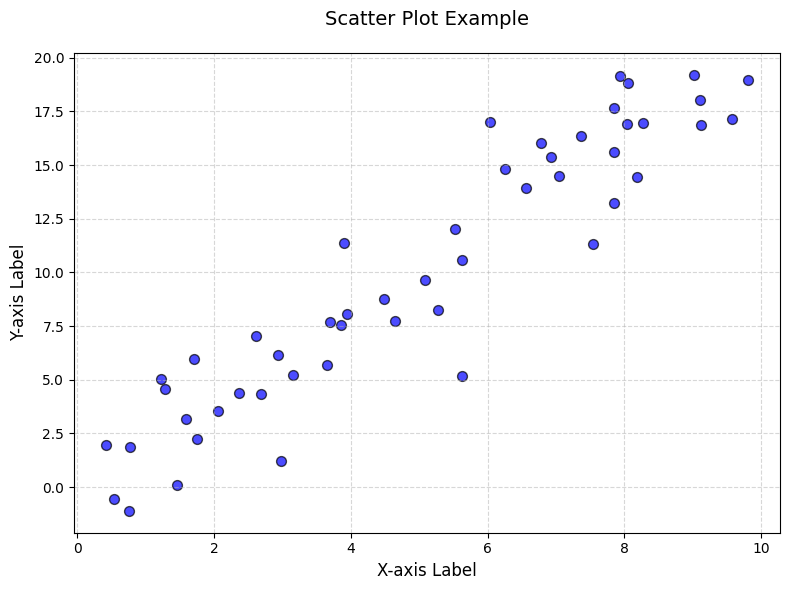

In [6]:
#3.Create a scatter plot using Matplotlib.
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.random.rand(50) * 10  # 50 random x-values (0-10)
y = 2 * x + np.random.randn(50) * 2  # Linear relationship with noise

# Create figure and axis
plt.figure(figsize=(8, 6))  # Set figure size (width, height) in inches

# Create scatter plot
plt.scatter(
    x, y,
    c='blue',          # Point color
    marker='o',        # Point shape (circle)
    alpha=0.7,         # Transparency (0-1)
    edgecolors='black', # Border color
    s=50               # Point size
)

# Add labels and title
plt.xlabel('X-axis Label', fontsize=12)
plt.ylabel('Y-axis Label', fontsize=12)
plt.title('Scatter Plot Example', fontsize=14, pad=20)

# Add grid and adjust layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()  # Prevent label cutoff

# Show plot
plt.show()

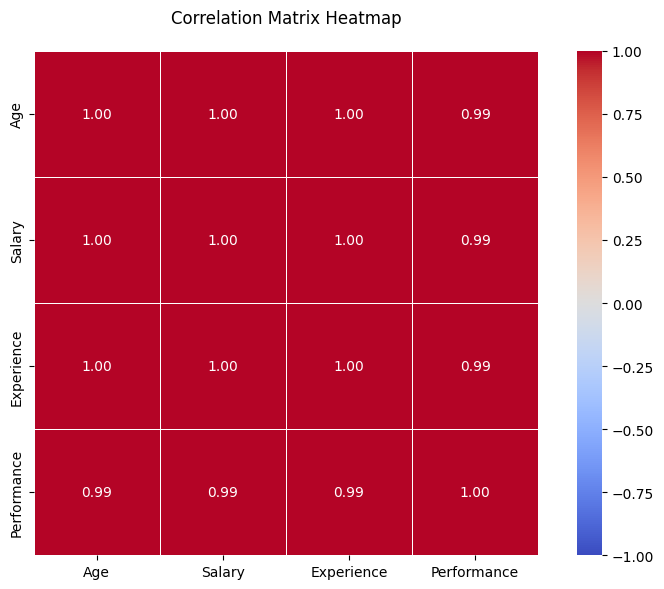

In [7]:
#4.How do you calculate the correlation matrix using Seaborn and visualize it with a heatmap?
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load or create your dataset
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 70000, 80000, 90000],
    'Experience': [1, 3, 5, 7, 9],
    'Performance': [3.2, 3.8, 4.1, 4.5, 4.9]
})

# 2. Calculate correlation matrix
corr_matrix = df.corr()

# 3. Create heatmap visualization
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,       # Show correlation values
    fmt=".2f",       # Format to 2 decimal places
    cmap='coolwarm',  # Color scheme
    vmin=-1,         # Minimum correlation value
    vmax=1,          # Maximum correlation value
    linewidths=0.5,   # Add lines between cells
    square=True       # Force square cells
)

# 4. Add title and adjust layout
plt.title('Correlation Matrix Heatmap', pad=20)
plt.tight_layout()
plt.show()

In [8]:
#5.Generate a bar plot using Plotly.
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [25, 40, 30, 50]
}
df = pd.DataFrame(data)

# Create bar plot
fig = px.bar(
    df,
    x='Category',
    y='Values',
    title='Basic Bar Plot',
    labels={'Values': 'Measurements'},  # Custom axis labels
    color='Category',  # Color by category
    color_discrete_sequence=px.colors.qualitative.Pastel  # Color palette
)

# Show plot
fig.show()

In [9]:
#6.Create a DataFrame and add a new column based on an existing column.
import pandas as pd

# Create a DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Salary': [50000, 60000, 70000]
}
df = pd.DataFrame(data)

# Add new column based on existing column
df['Bonus'] = df['Salary'] * 0.10  # 10% bonus calculation

print(df)

      Name  Age  Salary   Bonus
0    Alice   25   50000  5000.0
1      Bob   30   60000  6000.0
2  Charlie   35   70000  7000.0


In [10]:
#7.Write a program to perform element-wise multiplication of two NumPy arrays.
import numpy as np

# Method 1: Using the * operator (most common)
def elementwise_multiply(a, b):
    return a * b

# Method 2: Using np.multiply()
def elementwise_multiply_np(a, b):
    return np.multiply(a, b)

# Create two sample arrays
array1 = np.array([[1, 2, 3], [4, 5, 6]])
array2 = np.array([[7, 8, 9], [10, 11, 12]])

# Perform multiplication
result = elementwise_multiply(array1, array2)

print("Array 1:\n", array1)
print("\nArray 2:\n", array2)
print("\nElement-wise multiplication result:\n", result)

Array 1:
 [[1 2 3]
 [4 5 6]]

Array 2:
 [[ 7  8  9]
 [10 11 12]]

Element-wise multiplication result:
 [[ 7 16 27]
 [40 55 72]]


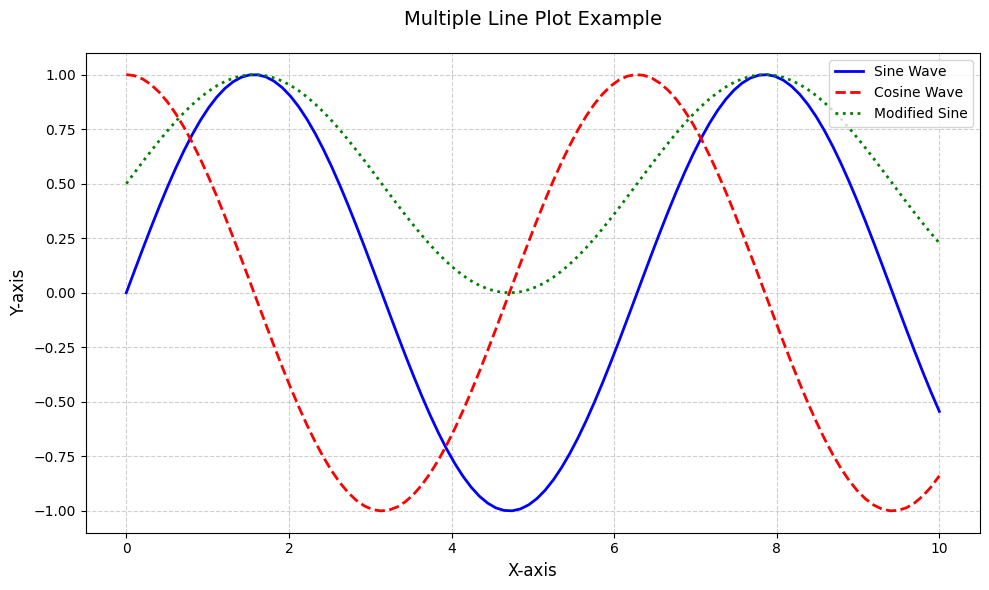

In [11]:
#8.Create a line plot with multiple lines using Matplotlib.
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
x = np.linspace(0, 10, 100)  # X-axis values (0 to 10 in 100 steps)
y1 = np.sin(x)                # First line: sine wave
y2 = np.cos(x)                # Second line: cosine wave
y3 = 0.5 * np.sin(x) + 0.5    # Third line: modified sine wave

# Create figure and axis
plt.figure(figsize=(10, 6))  # Set figure size (width, height in inches)

# Plot multiple lines with customization
plt.plot(x, y1,
         label='Sine Wave',
         color='blue',
         linewidth=2,
         linestyle='-')

plt.plot(x, y2,
         label='Cosine Wave',
         color='red',
         linewidth=2,
         linestyle='--')

plt.plot(x, y3,
         label='Modified Sine',
         color='green',
         linewidth=2,
         linestyle=':')

# Add title and labels
plt.title('Multiple Line Plot Example', fontsize=14, pad=20)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)

# Customize the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add dashed grid
plt.legend(fontsize=10, loc='upper right')  # Show legend
plt.xticks(fontsize=10)  # Customize x-axis ticks
plt.yticks(fontsize=10)  # Customize y-axis ticks

# Adjust layout and show plot
plt.tight_layout()  # Prevent label cutoff
plt.show()

In [12]:
#9.Generate a Pandas DataFrame and filter rows where a column value is greater than a threshold.
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'Product': ['A', 'B', 'C', 'D', 'E'],
    'Price': [25, 50, 15, 75, 40],
    'Quantity': [10, 5, 20, 8, 12]
}
df = pd.DataFrame(data)

# Filter rows where Price > 30
filtered_df = df[df['Price'] > 30]

print("Original DataFrame:")
print(df)
print("\nFiltered DataFrame (Price > 30):")
print(filtered_df)


Original DataFrame:
  Product  Price  Quantity
0       A     25        10
1       B     50         5
2       C     15        20
3       D     75         8
4       E     40        12

Filtered DataFrame (Price > 30):
  Product  Price  Quantity
1       B     50         5
3       D     75         8
4       E     40        12


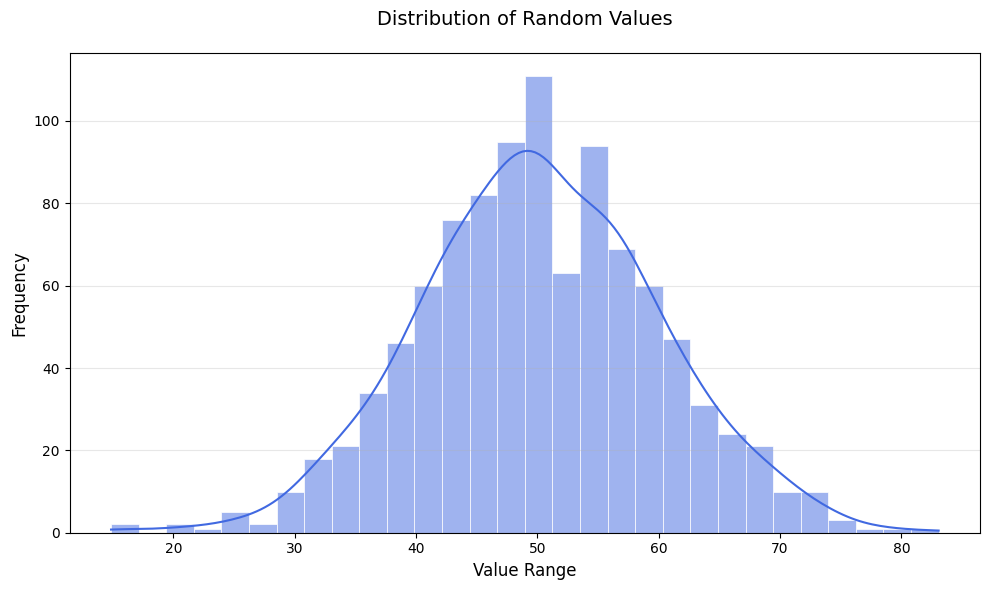

In [13]:
#10.Create a histogram using Seaborn to visualize a distribution.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = np.random.normal(loc=50, scale=10, size=1000)  # Normal distribution

# Create histogram
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(
    data=data,
    bins=30,            # Number of bins
    kde=True,           # Add kernel density estimate
    color='royalblue',  # Bar color
    edgecolor='white',  # Edge color
    linewidth=0.5       # Edge line width
)

# Add titles and labels
plt.title('Distribution of Random Values', fontsize=14, pad=20)
plt.xlabel('Value Range', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize grid and layout
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [14]:
#11.Perform matrix multiplication using NumPy.
import numpy as np

# Create two matrices
A = np.array([[1, 2], [3, 4]])  # 2x2
B = np.array([[5, 6], [7, 8]])  # 2x2

# Method 1: Using @ operator (Python 3.5+)
result = A @ B

# Method 2: Using np.matmul
result = np.matmul(A, B)

print("Matrix A:\n", A)
print("\nMatrix B:\n", B)
print("\nMatrix Product (A × B):\n", result)

Matrix A:
 [[1 2]
 [3 4]]

Matrix B:
 [[5 6]
 [7 8]]

Matrix Product (A × B):
 [[19 22]
 [43 50]]


In [17]:
#12.Use Pandas to load a CSV file and display its first 5 rows.
from io import StringIO
import pandas as pd

# Simulate CSV data (replace with real file)
csv_data = """Name,Age,Occupation
Alice,28,Engineer
Bob,35,Data Scientist
Charlie,42,Manager
Diana,29,Designer
Ethan,31,Analyst"""

# Create DataFrame from string (just for demo)
df = pd.read_csv(StringIO(csv_data))

# Display with styling
print("📊 First 5 rows:")
display(df.head().style.set_properties(**{
    'background-color': 'lightblue',
    'color': 'black',
    'border-color': 'white'
}))



📊 First 5 rows:


,Name,Age,Occupation
0,Alice,28,Engineer
1,Bob,35,Data Scientist
2,Charlie,42,Manager
3,Diana,29,Designer
4,Ethan,31,Analyst


In [18]:
#13.Create a 3D scatter plot using Plotly
import plotly.express as px
import pandas as pd
import numpy as np

# Generate sample 3D data
np.random.seed(42)
n_points = 100
df = pd.DataFrame({
    'X': np.random.randn(n_points),
    'Y': np.random.randn(n_points),
    'Z': np.random.randn(n_points),
    'Value': np.random.uniform(1, 100, n_points),  # For color scale
    'Category': np.random.choice(['A', 'B', 'C'], n_points)  # For grouping
})

# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x='X',
    y='Y',
    z='Z',
    color='Value',              # Color by value
    symbol='Category',          # Different markers per category
    size='Value',               # Size by value
    opacity=0.8,                # Semi-transparent points
    title='Interactive 3D Scatter Plot',
    labels={'X': 'X Axis', 'Y': 'Y Axis', 'Z': 'Z Axis'},
    color_continuous_scale=px.colors.sequential.Viridis,
    hover_data=['Category']     # Show category on hover
)

# Customize layout
fig.update_layout(
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=0.1)  # Adjust initial view angle
        )
    ),
    margin=dict(l=0, r=0, b=0, t=30),  # Tight margins
    coloraxis_colorbar=dict(title='Intensity')
)

# Show plot (opens in browser)
fig.show()

# Save as HTML (optional)
fig.write_html("3d_scatter_plot.html")